In [1]:
import numpy as np
from scipy.io.wavfile import read
from python_speech_features import mfcc, delta
import os
import _pickle as pickle
from sklearn.mixture import GMM
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import pyaudio
import wave

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

In [3]:
def Train_MFCC_delta2(sr, audio):
    mfcc_feat = mfcc(audio,sr, 0.025, 0.01, 13,nfft=2048,appendEnergy = False)
    d_mfcc_feat = delta(mfcc_feat,2)
    dd_mfcc_feat = delta(d_mfcc_feat,2)
    features = np.asarray(())
    features = np.hstack([mfcc_feat, d_mfcc_feat, dd_mfcc_feat])
    features = preprocessing.scale(features)
    return features

In [4]:
def Test_MFCC_delta2(sr,audio):
    mfcc_feat = mfcc(audio,sr, 0.025, 0.01, 13, nfft=2048,appendEnergy = False)
    d_mfcc_feat = delta(mfcc_feat,2)
    dd_mfcc_feat = delta(d_mfcc_feat,2)
    features = np.asarray(())
    features = np.hstack([mfcc_feat, d_mfcc_feat, dd_mfcc_feat])
    #features = [np.concatenate((i,np.zeros((1208-i.shape[0],39)))) for i in features]
    feat = np.asarray(())
    
    for i in range(features.shape[0]):
        temp = features[i,:]
        if np.isnan(np.min(temp)):
            continue
        else:
            if feat.size == 0:
                feat = temp
            else:
                feat = np.vstack((feat, temp))
                
    features = feat
    
    # SD
    features = preprocessing.scale(features)
    return features

In [5]:
def Similarity(a, b, answer, predict):
    if predict==answer:
        score = 100
    else:
        score = 100 + (abs(a-b)/b*1000)
    return score

# 注意事項: 錄音時讓自己的聲音盡量錄多點，空白音少點

# 1:N

recording...
finished recording
	detected as -  洪立全


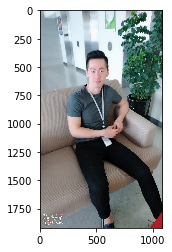

In [73]:
# Record a WAV file
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "test.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print ("recording...")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

# Voiceprint Identification
sourcepath = 'C:\\Users\\user\\Desktop\\科研部_SR\\'
modelpath  = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\"  

gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
files = [os.path.join(sourcepath,fname) for fname in os.listdir(sourcepath) if fname.endswith('.wav')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]
    
for f in files:
    #print(f)
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
        
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)

    answer = people[winner]

    print("\tdetected as - ", answer)
    image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+answer+'.jpg', 'r')
    plt.figure()
    imshow(np.asarray(image1))
    plt.show()

# 1:1

Detected as- 洪立全
Similarity:  93.90316521206387 %


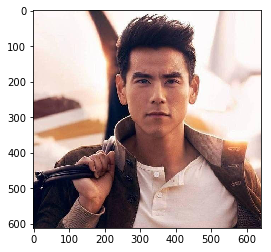

Partial Correct~ May I help you, 陳慶安?



In [74]:
'''# Record a WAV file
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "test.wav" #答案
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print ("recording...")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()'''

sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\"
modelpath = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\" 
files  = [os.path.join(sourcepath,f) for f in os.listdir(sourcepath) if f.endswith(".wav")] 
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]

owner = '陳慶安' # 想檢測的對象
for i in range(len(models)):
    if(people[i]==owner):
        owner_idx = i

for f in files:
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
        
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)
    #print(f.split('\\')[-1].split('.wav')[0])
    score = Similarity(log_likelihood[owner_idx], log_likelihood[winner], people[owner_idx], people[winner])
    #print(log_likelihood[owner_idx], log_likelihood[winner])
    print('Detected as-', people[winner])
    print("Similarity: ", score ,'%')
    if score <= 80:
        image0 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\Error.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image0))
        plt.show()
        print('Sorry, it belongs to '+owner+' instead of you. Please try again QAQ')
        
    elif (score < 99 and score >=95):
        image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+owner+'.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image1))
        plt.show()
        print('Almost Correct~ May I help you, '+owner+'?')

    elif (score < 95 and score >=90):
        image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+owner+'.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image1))
        plt.show()
        print('Partial Correct~ May I help you, '+owner+'?\n')        
        
    elif (score < 90 and score >=80):
        image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+owner+'.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image1))
        plt.show()
        print('You are maybe '+owner+' (?)\n')      
        
    else: # higher than 99 
        image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+owner+'.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image1))
        plt.show()
        print('Totally Correct~ May I help you, '+owner+'?\n')